In [ ]:
#@title Load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [ ]:
#@title Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target


In [ ]:
#@title Extracting feature data and target labels from the dataset
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                     columns=wine['feature_names'] + ['target'])
true_labels = data['target'].values



In [ ]:
# Create a DataFrame for EDA
wine_df = pd.DataFrame(data=X, columns=wine.feature_names)
wine_df['Target'] = y

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(wine_df.head())

# Summary statistics
print("\nSummary Statistics:")
print(wine_df.describe())

Head of the DataFrame:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  prolin

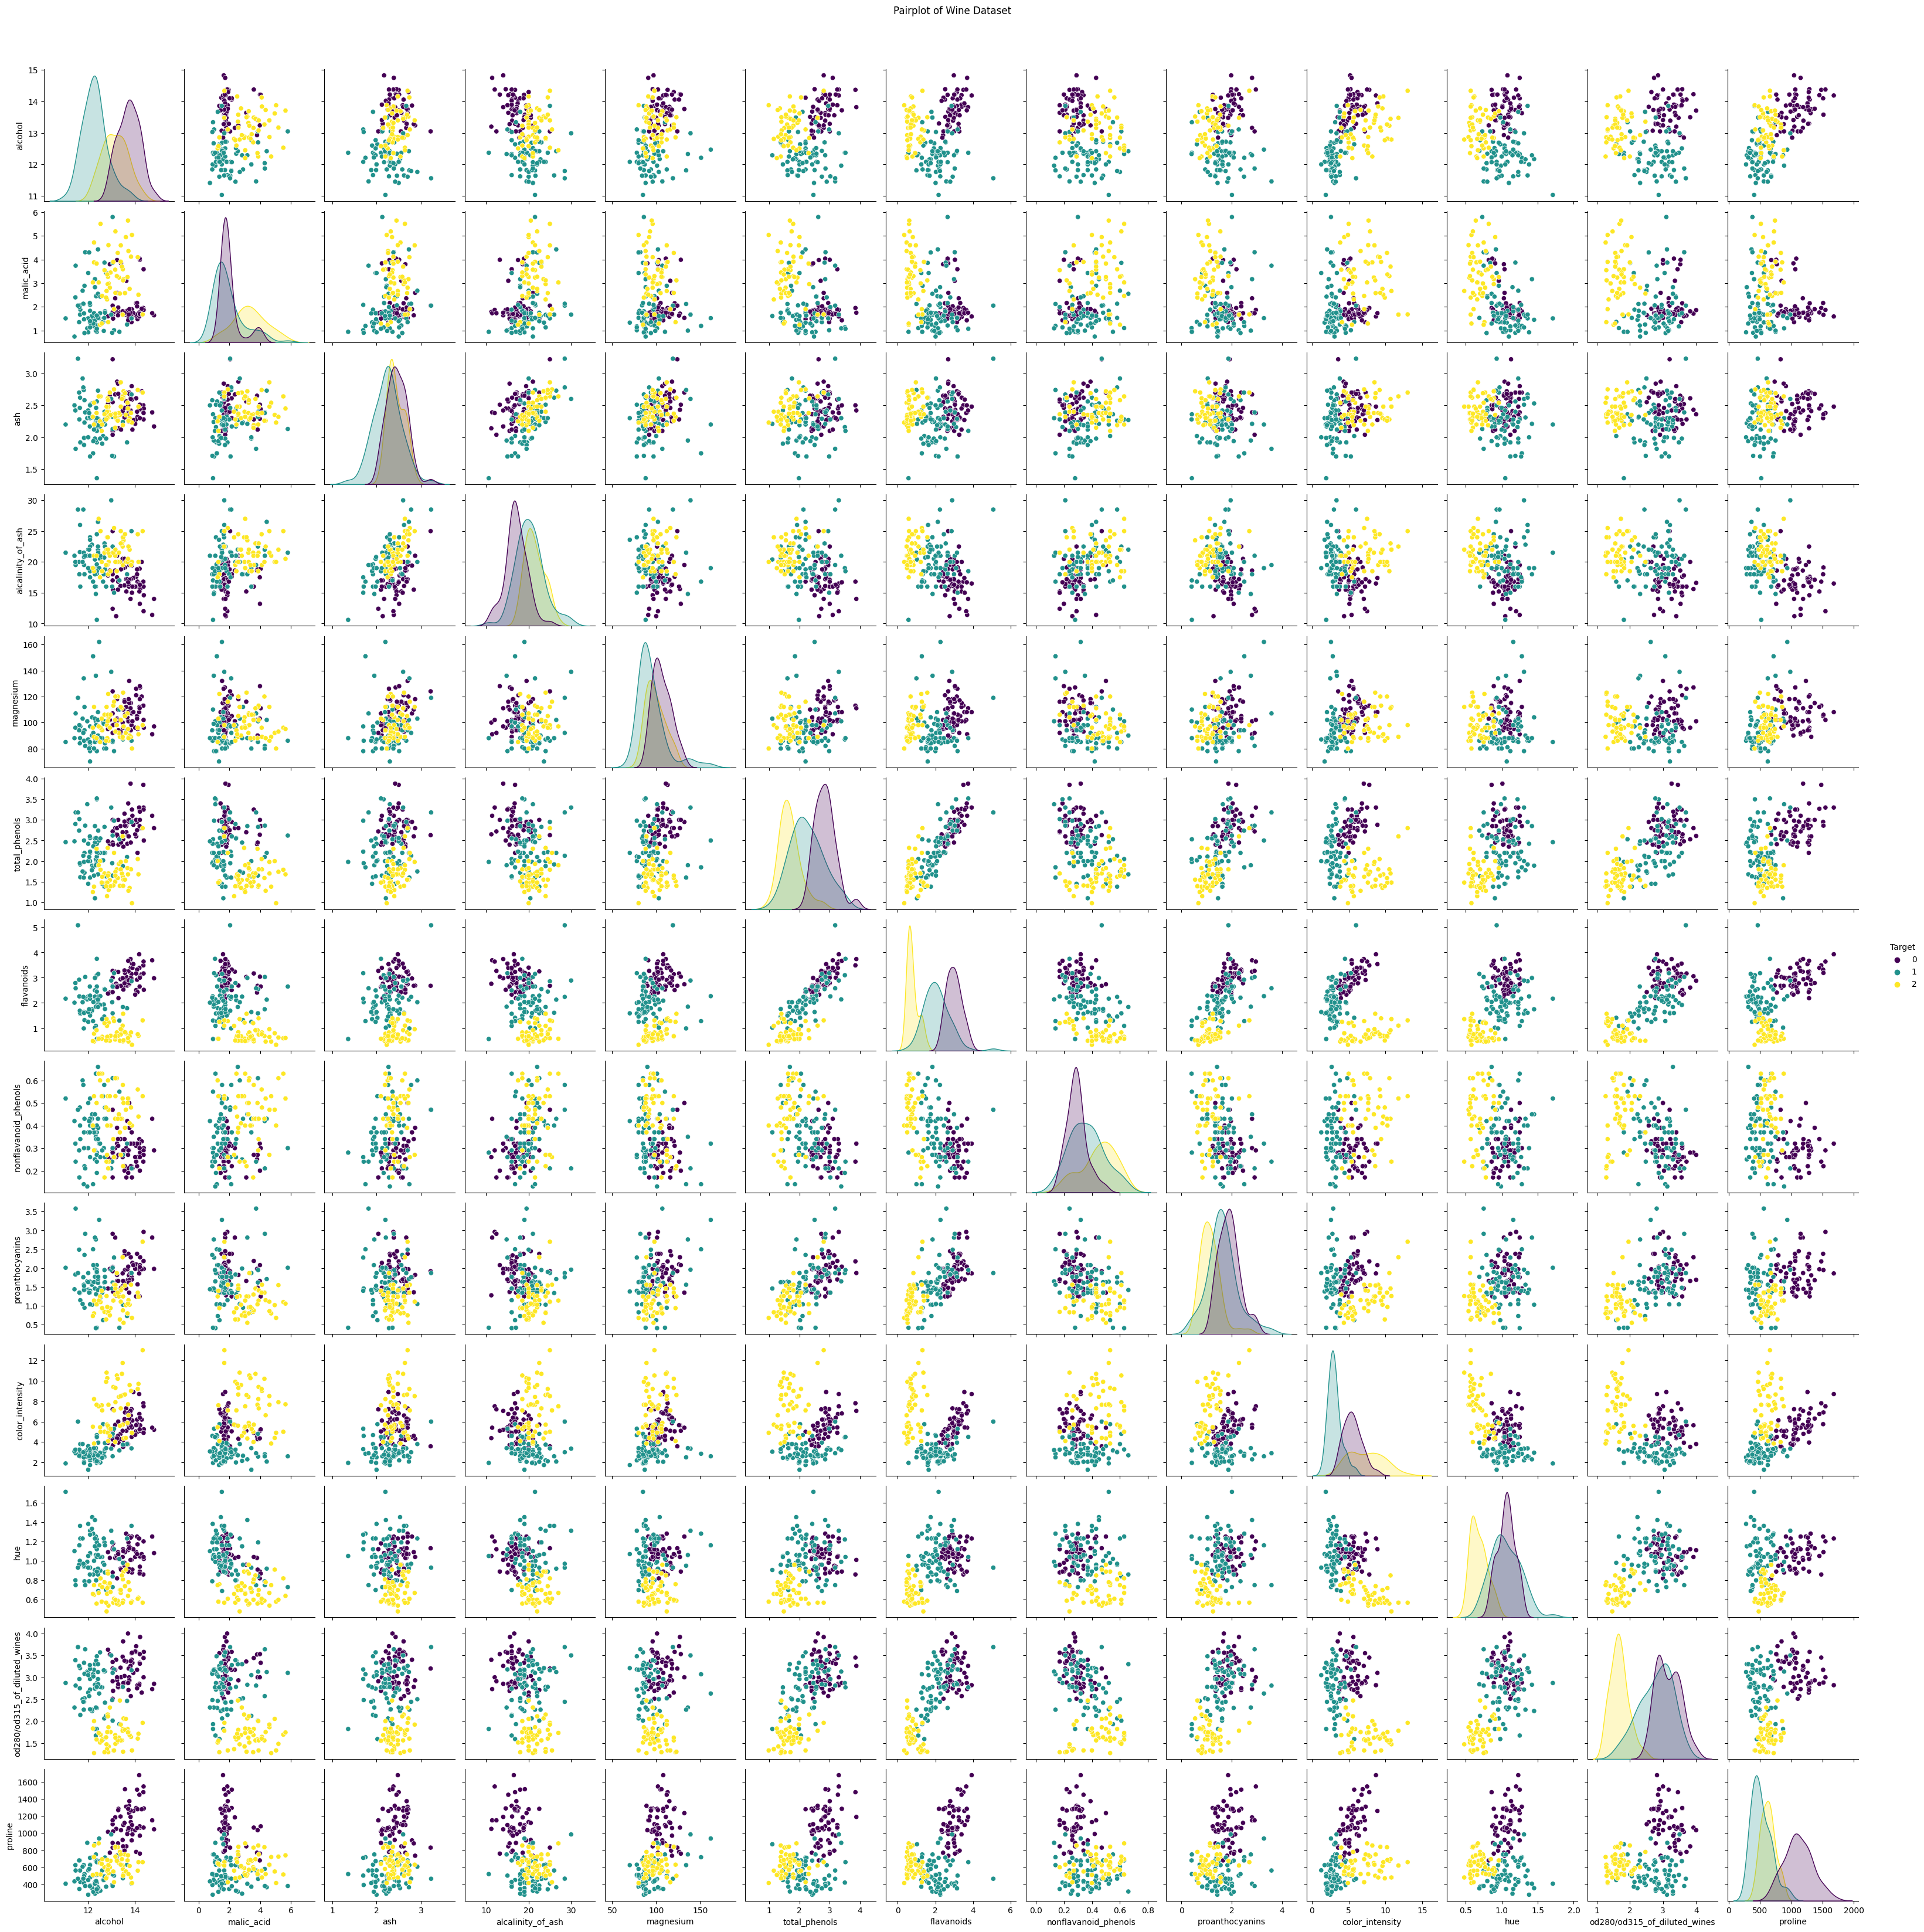

In [ ]:
#@title Pairplot for pairwise relationships
sns.pairplot(wine_df, hue='Target', palette='viridis')
plt.suptitle('Pairplot of Wine Dataset', y=1.02)
plt.show()

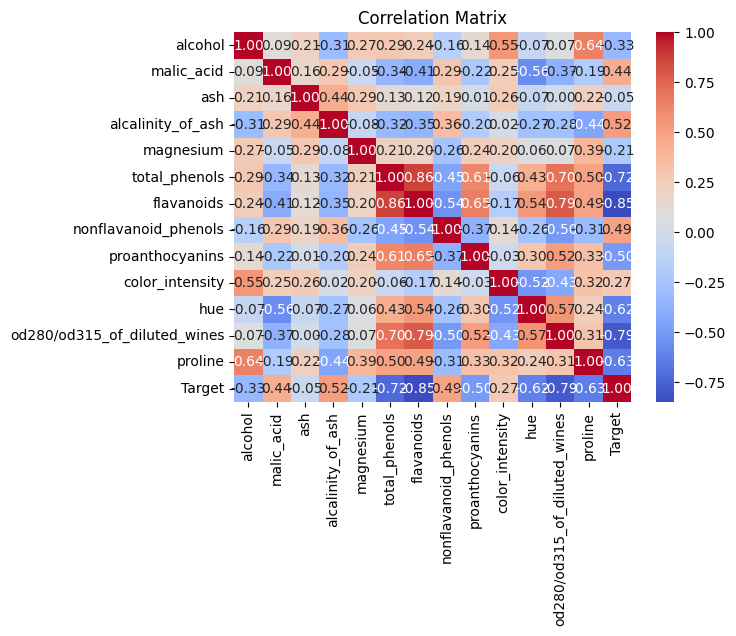

In [ ]:
#@title Correlation matrix
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#@title Standardize the data (mean=0, variance=1)
# Note: This both centers and scales the data

# Standardize the data in the DataFrame
scaler = StandardScaler()
wine_df_scaled = pd.DataFrame(scaler.fit_transform(wine_df.iloc[:, :-1]), columns=wine.feature_names)
X_scaled = wine_df_scaled.iloc[:]
wine_df_scaled['Target'] = wine_df['Target']

wine_df_scaled.describe()

alcohol    malic_acid           ash  alcalinity_of_ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean   7.943708e-15  3.592632e-16 -4.066660e-15      -7.983626e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          magnesium  total_phenols    flavanoids  nonflavanoid_phenols  \
count  1.780000e+02   1.780000e+02  1.780000e+02          1.780000e+02   
mean  -7.983626e-17  -3.991813e-17  9.979533e-16         -5.588538e-16   
std    1.002821e+00   1.002821e+00  1.002821e+00          1.002821e+00   
min   -2.088255e+00  -2.107246e+00 -1.695971e+00         -1.868234e+00   
25%   -8.244151e-01  -8.854682e-01 -8.275393e-01         -7.401412e-01   
50%   -1.222817e-01   9.595986e-02  1.061497e-01         -1.760948e-01   
75%    5.096384e-01   8.089974e-01  8.490851e-01          6.095413e-01   
max    4.371372e+00   2.539515e+00  3.062832e+00          2.402403e+00   

       proanthocyanins  color_intensity           hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean     -1.656602e-15    -3.442939e-16  1.636643e-15   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.069034e+00    -1.634288e+00 -2.094732e+00   
25%      -5.972835e-01    -7.951025e-01 -7.675624e-01   
50%      -6.289785e-02    -1.592246e-01  3.312687e-02   
75%       6.291754e-01     4.939560e-01  7.131644e-01   
max       3.485073e+00     3.435432e+00  3.301694e+00   

       od280/od315_of_diluted_wines       proline      Target  
count                  1.780000e+02  1.780000e+02  178.000000  
mean                   2.235415e-15 -1.197544e-16    0.938202  
std                    1.002821e+00  1.002821e+00    0.775035  
min                   -1.895054e+00 -1.493188e+00    0.000000  
25%                   -9.522483e-01 -7.846378e-01    0.000000  
50%                    2.377348e-01 -2.337204e-01    1.000000  
75%                    7.885875e-01  7.582494e-01    2.000000  
max                    1.960915e+00  2.971473e+00    2.000000

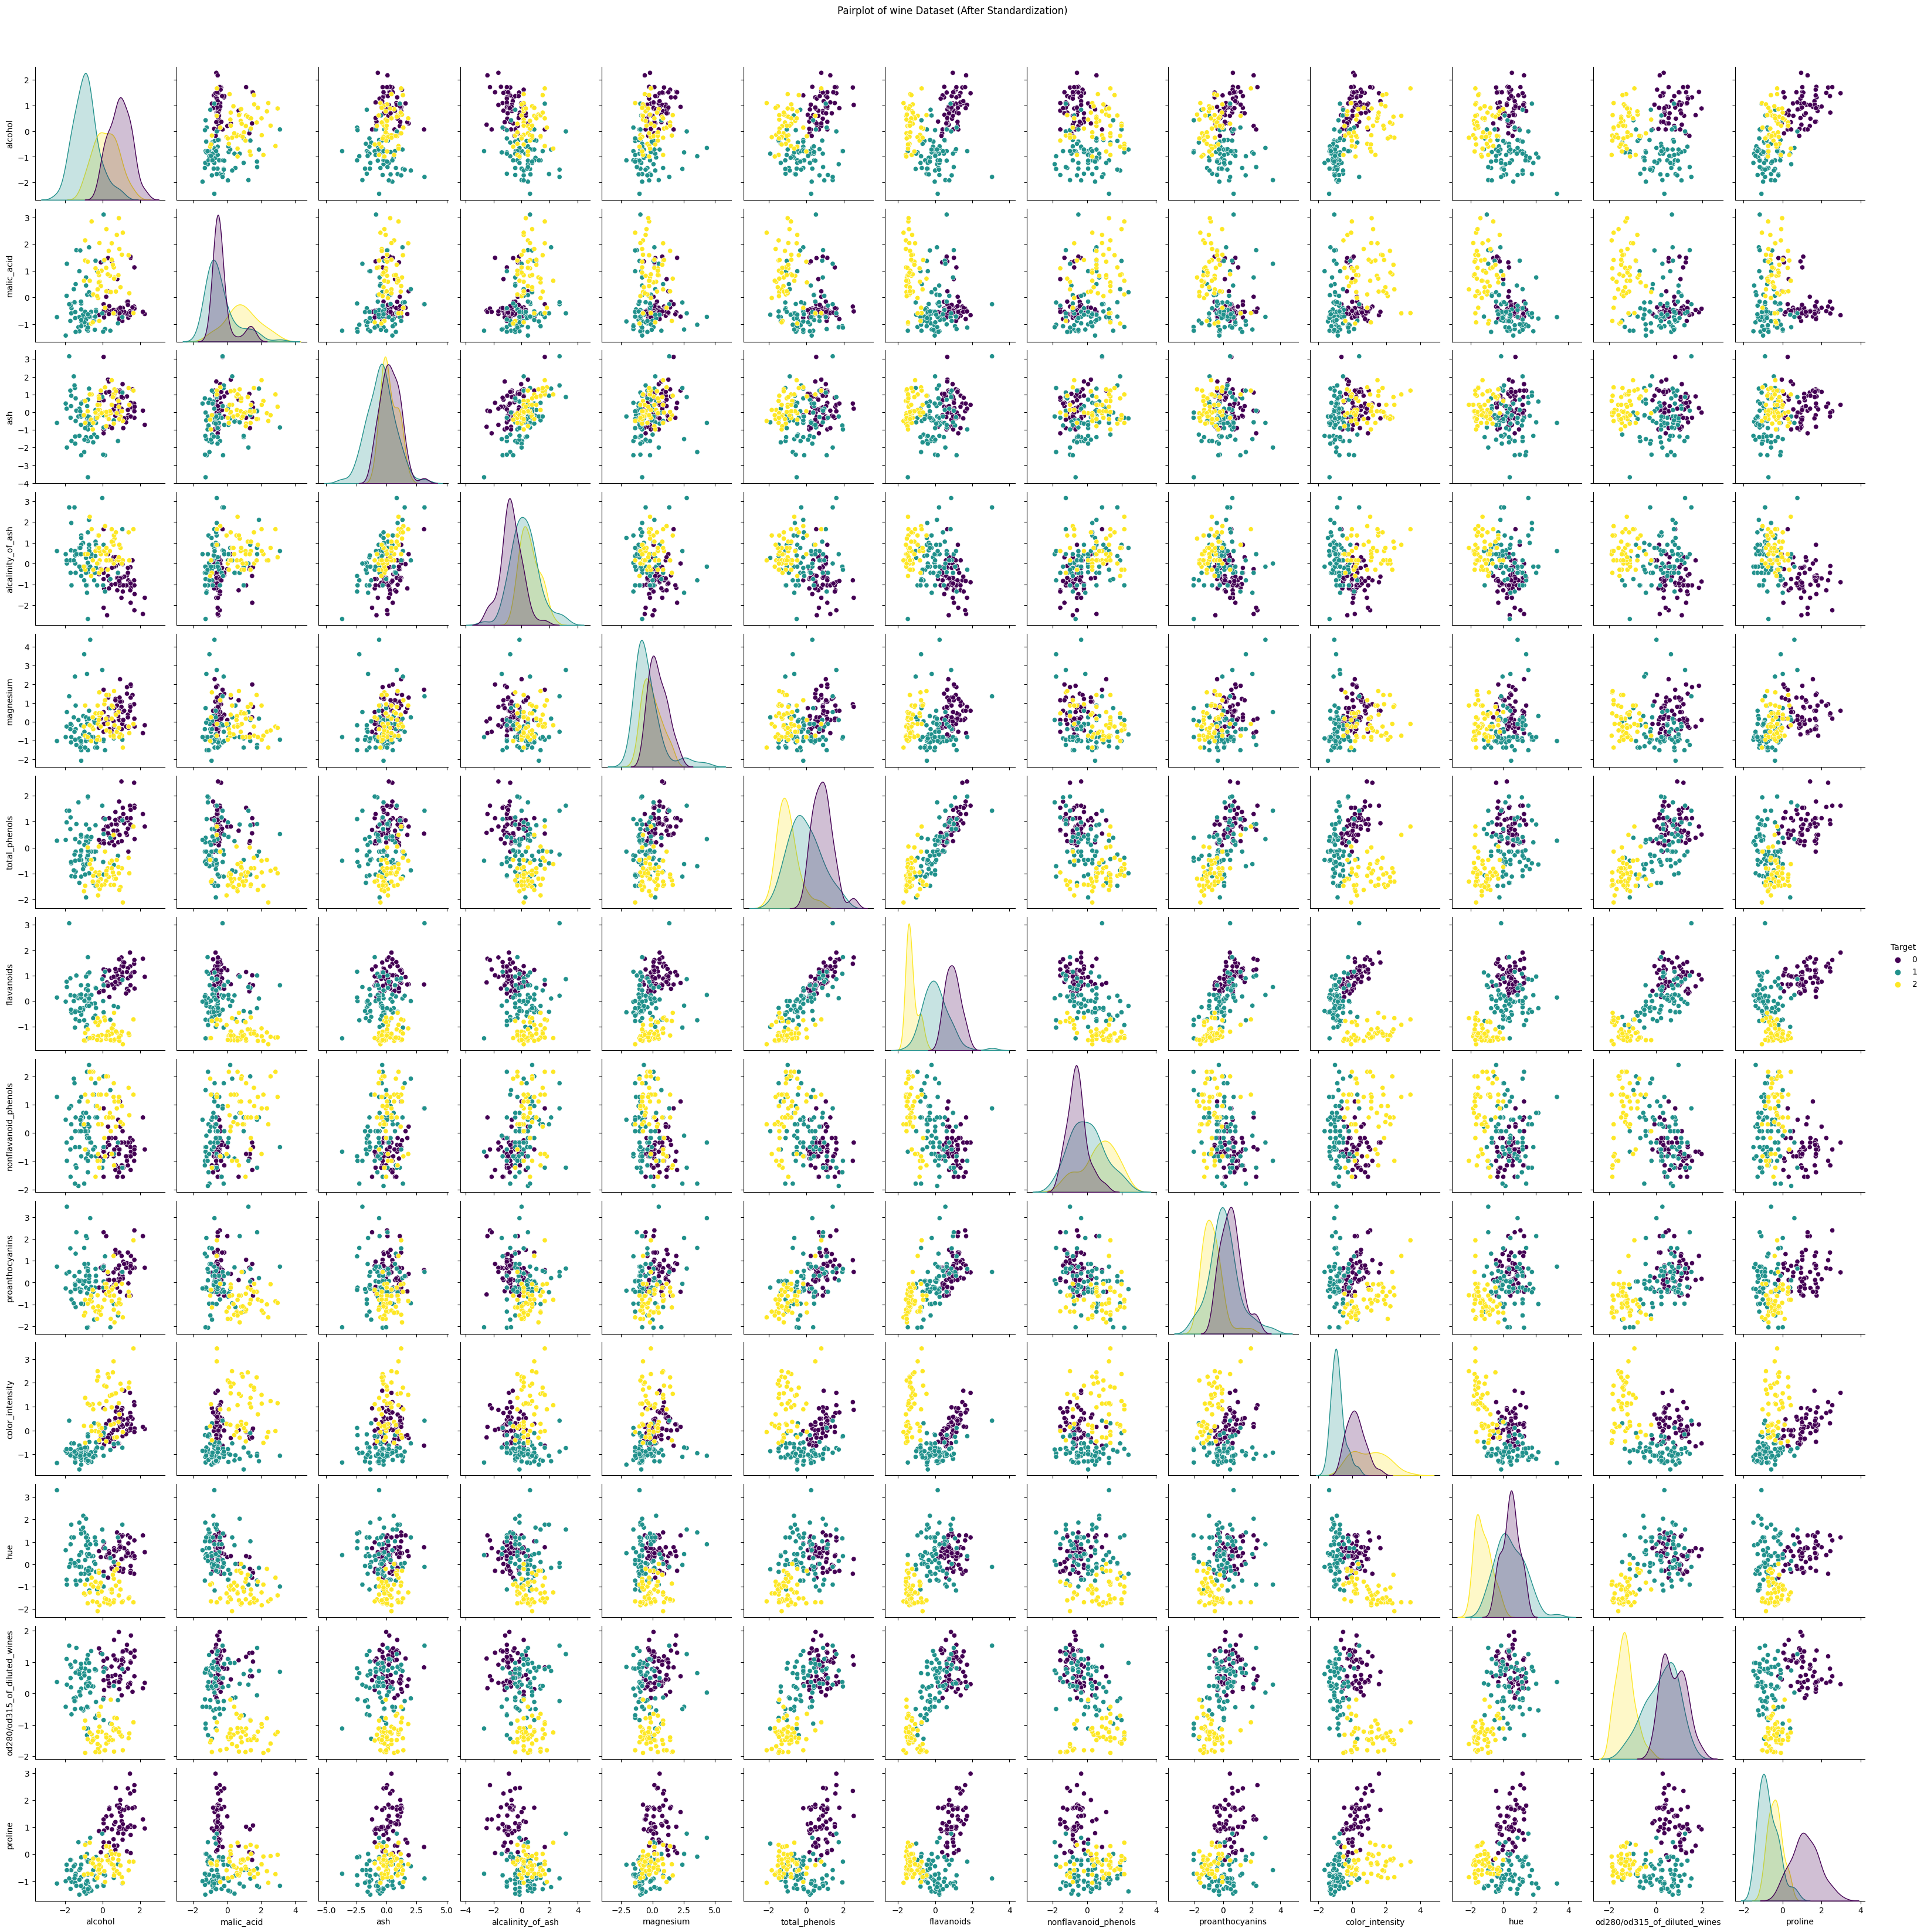

In [ ]:
#@title Notice that our data is now centered and scaled
sns.pairplot(wine_df_scaled,
             hue='Target',
             palette='viridis',
             )
plt.suptitle('Pairplot of wine Dataset (After Standardization)', y=1.02)
plt.show()

In [ ]:
#@title Perform PCA

components = 4

# Apply PCA with two components for visualization
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_scaled)

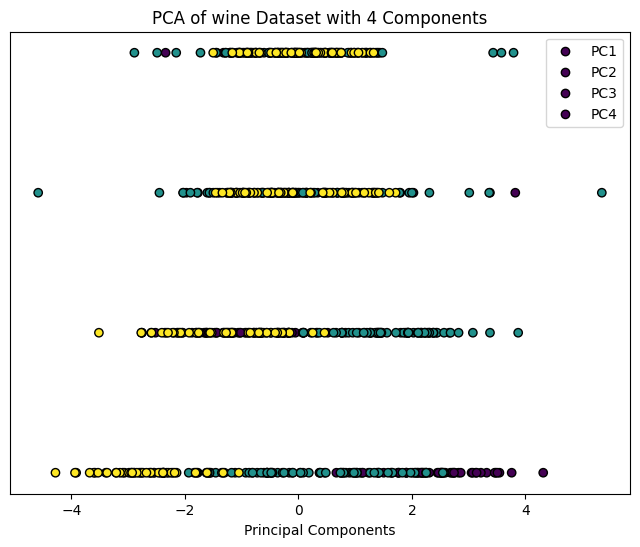

In [ ]:
#@title Plot the transformed data
plt.figure(figsize=(8, 6))
for j in range(components):
    plt.scatter(X_pca[:, j], np.zeros_like(X_pca[:, j]) + j, c=y, cmap='viridis', edgecolor='k', label=f'PC{j + 1}')

plt.title(f'PCA of wine Dataset with {components} Components')
plt.xlabel('Principal Components')
plt.yticks([])
plt.legend(loc='upper right')
plt.show()

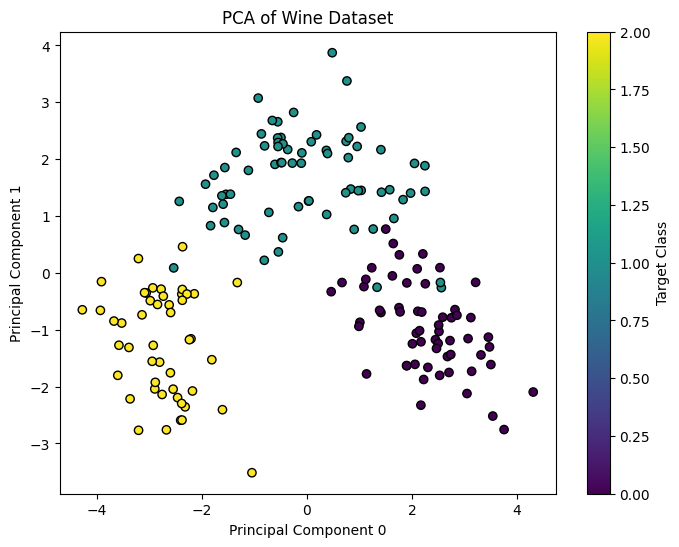

In [ ]:
#@title 2D Plot of First Two PCs
i = 0
j = 1

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, i], X_pca[:, j], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA of Wine Dataset')
plt.xlabel(f'Principal Component {i}')
plt.ylabel(f'Principal Component {j}')
plt.colorbar(label='Target Class')
plt.show()


**Reflection:**


*   Standardizing the data for mean=0, variance=1, result in scaled and centered data which increases the efficiency of pca.
*   Choosing the suitable target values and feature data.
*   Correlation Analysis: Explore the correlation between features to identify potential redundancies.
*Selecting the Number of Components: Test various principal component counts and assess the effects on explained variance.
*Interpretation: To understand the underlying patterns and structures that the PCA captured, interpret the principal components.

**Potential Ways to Further Improve the Model:**

* Fine-Tuning PCA Parameters: Experiment with different PCA parameters, such as the number of components or the method used.
* Feature Selection: Combine PCA with feature selection techniques to identify the most relevant features for the specific modeling task.





**OPTIONAL TASKS**

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903 ]


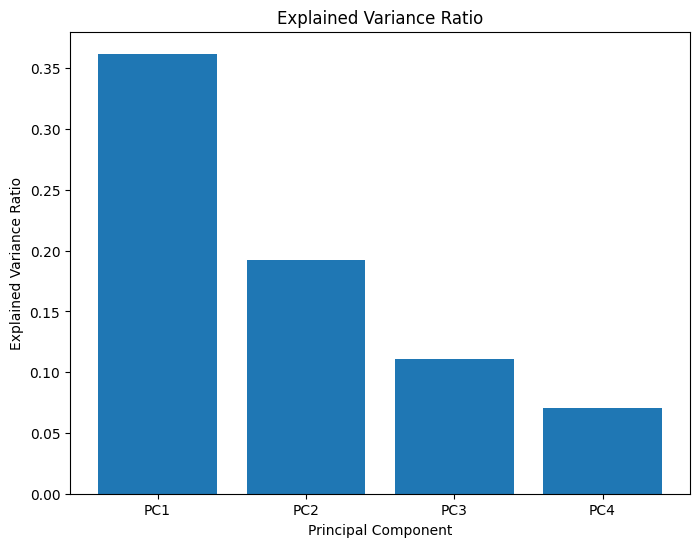

In [ ]:
#@title Visualization of Variance
# Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, tick_label=[f"PC{i}" for i in range(1, len(explained_variance_ratio) + 1)])
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()



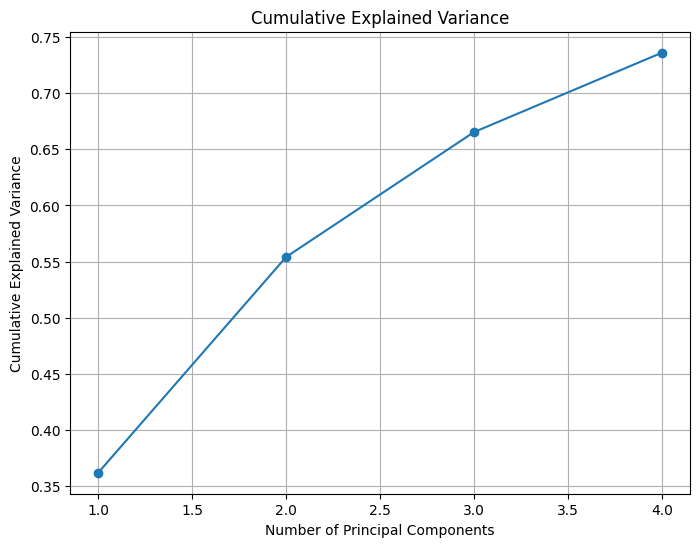

In [ ]:
#@title Visualization of Total Variance
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Visualize cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


#### Loading Values


In [ ]:
#@title Display the proportion of each original feature in each principal component
loadings = pca.components_
proportion_var_explained = pca.explained_variance_ratio_

print("\nProportion of each variable in each principal component:")
for i in range(len(pca.components_)):
    print(f"\nPrincipal Component {i + 1}:")
    for j in range(len(wine.feature_names)):
        print(f"Weight in PCA {i+1} of {wine.feature_names[j]}: {loadings[i, j]:.4f} \t Proportion of Variance: {loadings[i, j] * proportion_var_explained[i]:.4f}")



Proportion of each variable in each principal component:

Principal Component 1:
Weight in PCA 1 of alcohol: 0.1443 	 Proportion of Variance: 0.0522
Weight in PCA 1 of malic_acid: -0.2452 	 Proportion of Variance: -0.0888
Weight in PCA 1 of ash: -0.0021 	 Proportion of Variance: -0.0007
Weight in PCA 1 of alcalinity_of_ash: -0.2393 	 Proportion of Variance: -0.0866
Weight in PCA 1 of magnesium: 0.1420 	 Proportion of Variance: 0.0514
Weight in PCA 1 of total_phenols: 0.3947 	 Proportion of Variance: 0.1429
Weight in PCA 1 of flavanoids: 0.4229 	 Proportion of Variance: 0.1531
Weight in PCA 1 of nonflavanoid_phenols: -0.2985 	 Proportion of Variance: -0.1081
Weight in PCA 1 of proanthocyanins: 0.3134 	 Proportion of Variance: 0.1135
Weight in PCA 1 of color_intensity: -0.0886 	 Proportion of Variance: -0.0321
Weight in PCA 1 of hue: 0.2967 	 Proportion of Variance: 0.1074
Weight in PCA 1 of od280/od315_of_diluted_wines: 0.3762 	 Proportion of Variance: 0.1362
Weight in PCA 1 of proline

#Model Comparison on PCA wine Data

Below, you can change the number of PCA components used in the modeling to see how this impacts which model is best on this data and how accurate the model predictions are.

In [ ]:
#@title Model Selection

components_used = 3
X_pca_red = X_pca[:, :components_used]

# Cross-validation for model selection
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

best_model = None
best_score = 0

for model_name, model in models.items():
    scores = cross_val_score(model, X_pca_red, y, cv=5)
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_model = model_name

print(f"Best Model: {best_model}")
print(f"Average Cross-Validation Score: {best_score:.2f}")

# Hyperparameter tuning
if best_model == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 150],  #number of trees in random forest
        'max_depth': [None, 10, 20, 30],  #maximum depth of a tree
    }
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    grid_search.fit(X_pca_red, y)
    print("Best Hyperparameters for Random Forest:")
    print(grid_search.best_params_)


Best Model: SVM
Average Cross-Validation Score: 0.97
